# Kmeasn Clustering with 'Kmeans++' Initialization

In [2]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs, make_classification, make_swiss_roll, make_moons  

import sys

# Create a class for k-means clustering algorithm
class KMeansClustering(object):
    def __init__(self, K:int, max_iter:int = 200) -> None:
        super().__init__()
        self.K = K
        self.max_iter = max_iter
        self.num_datapoints, self.num_feat = X.shape
        self.fitted_centroids = None
        self.inertia = 0

    def init_centroids(self, X:np.ndarray) -> np.ndarray:
        # centroids = np.zeros(shape=(self.K, self.num_feat))
        # for k in range(self.K):
        #     centroid = X[np.random.randint(1,len(X))]
        #     centroids[k] = centroid
        # return centroids

        centroids = []
        centroids.append(X[np.random.randint(1,len(X))])
        for _ in range(self.K-1):
            distances = []
            for x in X:
                d = sys.maxsize
                for i in range(len(centroids)):
                    temp_distance = np.sqrt(np.sum((x - centroids[i])**2))
                    if temp_distance < d:
                        d = temp_distance
                distances.append(d)
            distances = np.array(distances)
            max_idx = np.argmax(distances)
            centroids.append(X[max_idx])
            distances = []
        return np.array(centroids)
    
    def create_clusters(self, X:np.ndarray, centroids:np.ndarray) -> List[list]:
        clusters = [[] for _ in range(self.K)] # Create K empty clusters
        for p_idx, p in enumerate(X):
            closest_centroid = np.argmin(np.sqrt(np.sum((p - centroids)**2, axis=1))) # Find closest centroid for each point using Euclidian distance
            clusters[closest_centroid].append(p_idx) # assign each data point_idx to the cluster(Centroid)
        return clusters
    
    def update_centroid(self, X:np.ndarray, clusters:List[list])-> np.ndarray:
        centroids = np.zeros(shape=(self.K, self.num_feat))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def plot_cluster(self, centroids, x, y):
        plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='viridis')
        plt.scatter(centroids[:,0], centroids[:,1], c='black', s=100, alpha=0.7, marker='x')
        plt.show()
    
    def plot_3d_cluster(self, centroids, x, y):
        ax = plt.axes(projection='3d')
        ax.scatter3D(x[:,0], x[:,1], x[:,2], c=y, s=20, alpha =0.3,cmap='viridis')
        ax.scatter3D(centroids[:,0], centroids[:,1], centroids[:,2], c='black', s=100, alpha=1.0, marker='o')
        plt.show()

    def get_y_label(self, clusters:List[list], X:np.ndarray):
        y_label = np.zeros(shape=(self.num_datapoints))
        for idx, cluster in enumerate(clusters):
            for point_idx in cluster:
                y_label[point_idx] = idx
        return y_label

    def predict(self, X:np.ndarray):
        pass

    def fit(self, X:np.ndarray):
        centroids = self.init_centroids(X)
        for i in range(self.max_iter):
            clusters = self.create_clusters(X, centroids)
            prev_centroids = centroids
            centroids = self.update_centroid(X, clusters)
            print(f'Centroids at iter {i+1}: {centroids[0]}')

            diff = prev_centroids - centroids
            if diff.any() < 0.0001:
                break

        self.fitted_centroids_ = centroids

        y_label = self.get_y_label(clusters, X)

        if self.num_feat == 2:
            self.plot_cluster(centroids,X, y_label)
        elif self.num_feat == 3:
            self.plot_3d_cluster(centroids, X, y_label)
        
        return y_label

Centroids at iter 1: [-7.85389784 -4.48405941]
Centroids at iter 2: [-8.1967569  -3.95516163]
Centroids at iter 3: [-8.33491556 -3.68887105]
Centroids at iter 4: [-8.40444973 -3.50899876]
Centroids at iter 5: [-8.44862017 -3.40591597]
Centroids at iter 6: [-8.44643297 -3.2989486 ]
Centroids at iter 7: [-8.45663525 -3.23561213]
Centroids at iter 8: [-8.48178053 -3.23256396]
Centroids at iter 9: [-8.49081313 -3.23947863]
Centroids at iter 10: [-8.53738071 -3.25299078]
Centroids at iter 11: [-8.5628583  -3.24455005]
Centroids at iter 12: [-8.61236619 -3.25389477]
Centroids at iter 13: [-8.6977211 -3.2765512]
Centroids at iter 14: [-8.771901   -3.31790419]
Centroids at iter 15: [-8.85501015 -3.35151352]
Centroids at iter 16: [-8.94233397 -3.39684493]
Centroids at iter 17: [-9.08095812 -3.43679609]
Centroids at iter 18: [-9.16395533 -3.48444269]
Centroids at iter 19: [-9.25486889 -3.52551542]
Centroids at iter 20: [-9.43709792 -3.59631727]
Centroids at iter 21: [-9.59746586 -3.65944416]
Cen

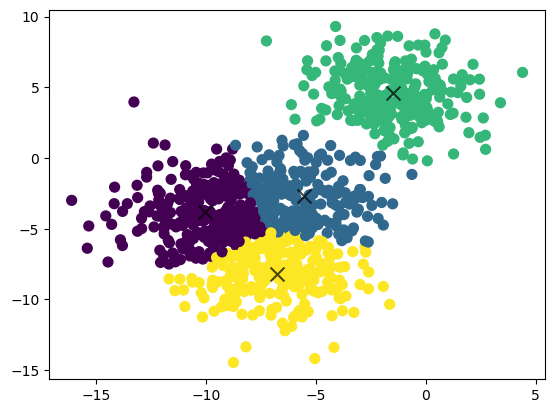

array([0., 3., 2., 3., 3., 1., 1., 1., 2., 0., 1., 1., 2., 2., 1., 1., 1.,
       3., 3., 3., 0., 1., 0., 2., 0., 3., 3., 3., 2., 0., 3., 3., 3., 3.,
       2., 2., 2., 2., 0., 1., 3., 2., 0., 1., 3., 3., 0., 2., 3., 3., 2.,
       3., 1., 0., 2., 1., 0., 0., 3., 2., 3., 3., 1., 0., 0., 2., 2., 2.,
       2., 3., 1., 3., 1., 1., 3., 2., 1., 0., 2., 0., 3., 3., 0., 2., 2.,
       0., 2., 3., 2., 3., 3., 2., 1., 2., 1., 0., 2., 0., 0., 0., 0., 3.,
       2., 1., 0., 1., 3., 0., 1., 2., 1., 3., 0., 2., 3., 1., 2., 1., 0.,
       0., 1., 2., 3., 1., 3., 3., 2., 3., 2., 2., 2., 0., 2., 0., 0., 0.,
       3., 0., 3., 3., 3., 0., 1., 3., 0., 2., 1., 0., 0., 3., 0., 1., 3.,
       2., 0., 1., 0., 0., 3., 3., 3., 1., 2., 3., 0., 0., 2., 3., 1., 1.,
       0., 0., 3., 3., 0., 0., 1., 0., 3., 3., 3., 3., 1., 0., 3., 2., 3.,
       0., 3., 2., 2., 3., 0., 3., 1., 2., 0., 0., 2., 0., 1., 3., 3., 0.,
       1., 1., 0., 2., 3., 2., 3., 2., 0., 0., 0., 0., 2., 2., 0., 2., 1.,
       3., 3., 1., 2., 3.

In [6]:
np.random.seed(45)
K = 4
num_of_features = 2
num_of_samples = 1000
X, _ = make_blobs(n_samples=num_of_samples, centers=K, n_features=num_of_features, cluster_std=2.0, random_state=1)

kmeans = KMeansClustering( K, max_iter=30)
y_label = kmeans.fit(X)
y_label